In [59]:
from os import mkdir, path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv('data/hotels-filtered.csv')

In [61]:
if not path.exists('images'):
    mkdir('images')
    mkdir('images/normal')
    mkdir('images/transparent')    

<hr style="border:2px solid blue">

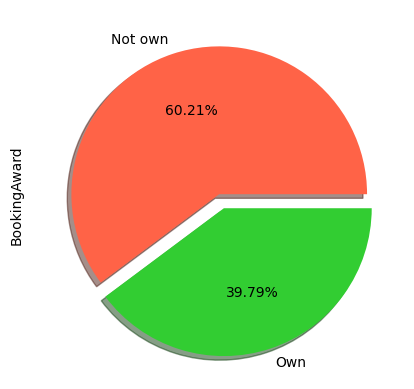

In [62]:
df.BookingAward.value_counts().plot(kind='pie', autopct='%1.2f%%', labels=['Not own', 'Own'],shadow=True,explode=(0, 0.1),colors=['tomato', 'limeGreen'])
plt.savefig('images/normal/Booking Award Pie Chart.png', bbox_inches='tight')
plt.savefig('images/transparent/Booking Award Pie Chart.png', bbox_inches='tight', transparent=True)
plt.show()

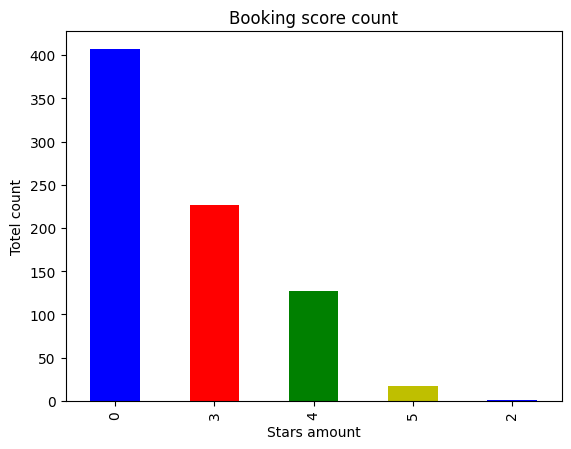

In [63]:
df.BookingScore.value_counts().plot(kind='bar', color=['b', 'r', 'g', 'y'])
plt.title('Booking score count')
plt.xlabel('Stars amount')
plt.ylabel('Totel count')
plt.savefig('images/normal/Booking Score bar Chart.png', bbox_inches='tight')
plt.savefig('images/transparent/BookingScore bar Chart.png', bbox_inches='tight', transparent=True)
plt.show()

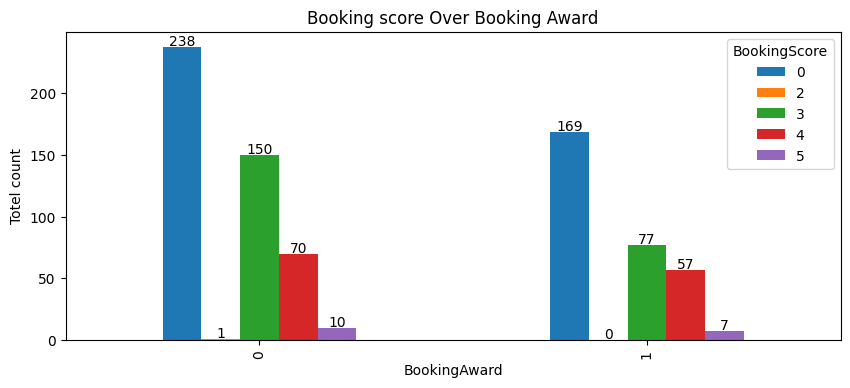

In [64]:
# the ratio is kept on when compering the two colums above
ct1 = pd.crosstab(df.BookingAward, df.BookingScore)
ax = ct1.plot(kind='bar', figsize=(10,4))
plt.title('Booking score Over Booking Award')
plt.ylabel('Totel count')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 1, str(int(i.get_height())), ha='center')

plt.savefig('images/normal/Booking score Over Booking Award.png', bbox_inches='tight')
plt.savefig('images/transparent/Booking score Over Booking Award.png', bbox_inches='tight', transparent=True)

plt.show()

<hr style="border:2px solid blue">

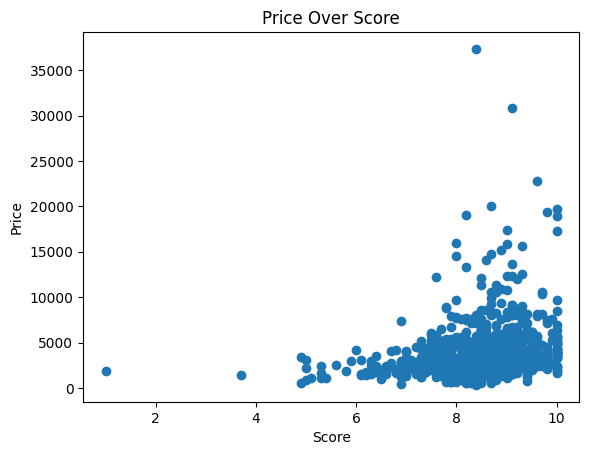

In [65]:
# we can see outliers at edges
plt.scatter(df.Score, df.Price)
plt.title('Price Over Score')
plt.xlabel('Score')
plt.ylabel('Price')

plt.savefig('images/normal/Price Over Score.png', bbox_inches='tight')
plt.savefig('images/transparent/Price Over Score.png', bbox_inches='tight', transparent=True)

plt.show()

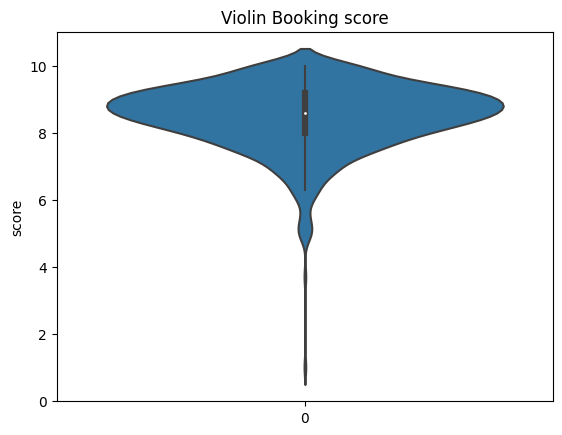

In [66]:
# we also can see it in violin plot
sns.violinplot(df.Score)
plt.title('Violin Booking score')
plt.ylabel('score')

plt.savefig('images/normal/Violin Booking score.png', bbox_inches='tight')
plt.savefig('images/transparent/Violin Booking score.png', bbox_inches='tight', transparent=True)

plt.show()

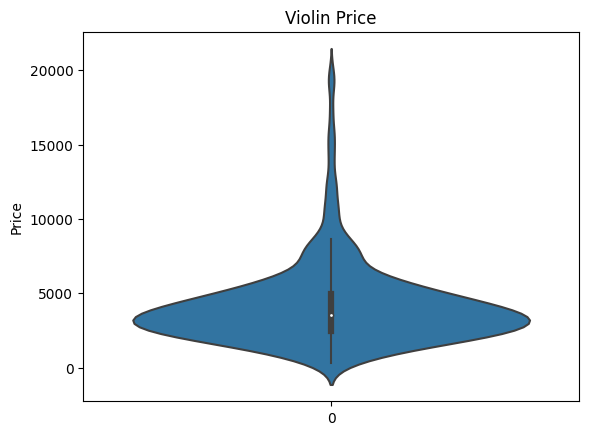

In [67]:
sns.violinplot(dfWithoutOutliers.Price)
plt.title('Violin Price')
plt.ylabel('Price')

plt.savefig('images/normal/Violin Price.png', bbox_inches='tight')
plt.savefig('images/transparent/Violin Price.png', bbox_inches='tight', transparent=True)

plt.show()

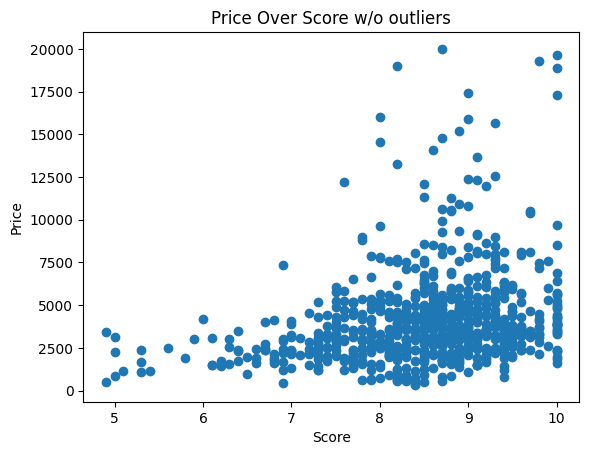

In [68]:
dfWithoutOutliers = df[(df.Price <= 20000) & (df.Score >= 4)]
plt.scatter(dfWithoutOutliers.Score, dfWithoutOutliers.Price)

plt.title('Price Over Score w/o outliers')
plt.xlabel('Score')
plt.ylabel('Price')

plt.savefig('images/normal/Price Over Score without outliers.png', bbox_inches='tight')
plt.savefig('images/transparent/Price Over Score without outliers.png', bbox_inches='tight', transparent=True)

plt.show()

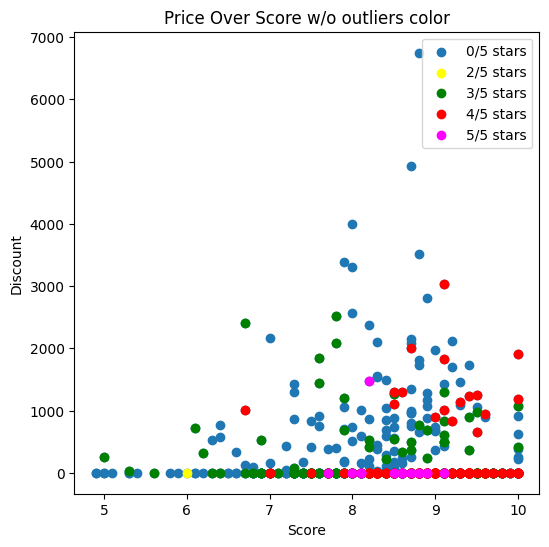

In [69]:
# we can see the 5 booking score can be recieved even in cheap hotels thet arn't rating high and 
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.scatter(dfWithoutOutliers.Score, dfWithoutOutliers.Discount)
ax.scatter(dfWithoutOutliers.Score[dfWithoutOutliers.BookingScore==2], dfWithoutOutliers.Discount[dfWithoutOutliers.BookingScore==2], c='yellow')
ax.scatter(dfWithoutOutliers.Score[dfWithoutOutliers.BookingScore==3], dfWithoutOutliers.Discount[dfWithoutOutliers.BookingScore==3], c='green')
ax.scatter(dfWithoutOutliers.Score[dfWithoutOutliers.BookingScore==4], dfWithoutOutliers.Discount[dfWithoutOutliers.BookingScore==4], c='red')
ax.scatter(dfWithoutOutliers.Score[dfWithoutOutliers.BookingScore==5], dfWithoutOutliers.Discount[dfWithoutOutliers.BookingScore==5], c='magenta')
ax.legend(labels=['0/5 stars','2/5 stars', '3/5 stars', '4/5 stars', '5/5 stars'])

plt.title('Price Over Score w/o outliers color')
plt.xlabel('Score')
plt.ylabel('Discount')

plt.savefig('images/normal/Price Over Score without outliers color.png', bbox_inches='tight')
plt.savefig('images/transparent/Price Over Score without outliers color.png', bbox_inches='tight', transparent=True)

plt.show()

<hr style="border:2px solid blue">

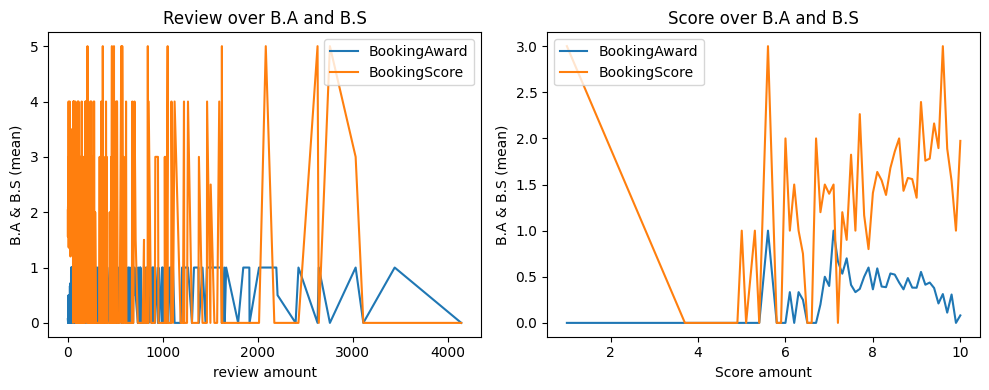

In [72]:
# we can see that more review doesn't mean better award. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(df.groupby('Review').mean()[['BookingAward','BookingScore' ]], label=['BookingAward', 'BookingScore'])
ax1.set_title('Review over B.A and B.S')
ax1.set_xlabel("review amount")
ax1.set_ylabel("B.A & B.S (mean)")
ax1.legend(loc='upper right')

# Plot data in the second subplot
ax2.plot(df.groupby(['Score']).mean()[['BookingAward','BookingScore']], label=['BookingAward','BookingScore'])
ax2.set_title('Score over B.A and B.S')
ax2.set_xlabel("Score amount")
ax2.set_ylabel("B.A & B.S (mean)")
ax2.legend(loc='upper left')

plt.savefig('images/normal/B.A and B.S.png', bbox_inches='tight')
plt.savefig('images/transparent/B.A and B.S.png', bbox_inches='tight', transparent=True)

# Show the plot
plt.tight_layout()
plt.show()

<hr style="border:2px solid blue">

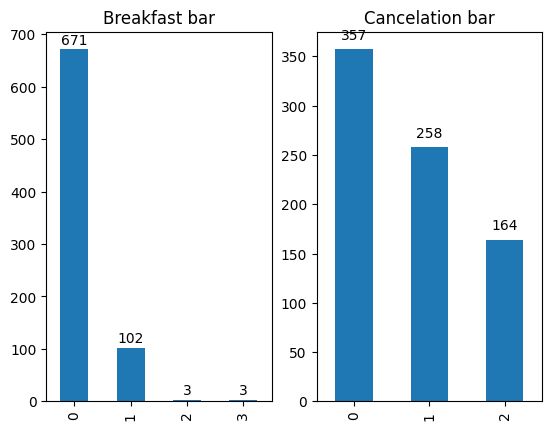

In [73]:
BreakfastLegend ={0: "None", 1: "Breakfast", 2: 'Breakfast&dinner', 3: 'all meals'}
cancellationLegend = {0: "None", 1: 'FREE cancellation • No prepayment needed', 2: 'Free cancellation'}

plt.subplot(1, 2, 1)
Breakfast_counts = df.Breakfast.value_counts()
Breakfast_counts.plot(kind='bar')
plt.title('Breakfast bar')

for i, v in enumerate(Breakfast_counts):
    plt.text(i, v + 10, str(v), ha='center')

plt.subplot(1, 2, 2)
cancellation_counts = df.Cancelation.value_counts()
cancellation_counts.plot(kind='bar')
plt.title('Cancelation bar')

for i, v in enumerate(cancellation_counts):
    plt.text(i, v + 10, str(v), ha='center')
    
plt.savefig('images/normal/Breakfast Cancelation bar.png', bbox_inches='tight')
plt.savefig('images/transparent/Breakfast Cancelation bar.png', bbox_inches='tight', transparent=True)

plt.show()

<hr style="border:2px solid blue">

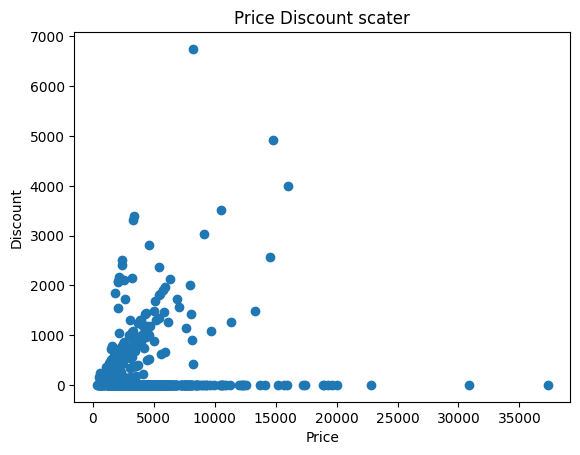

In [74]:
# Remove outliers
plt.scatter(df.Price, df.Discount)

plt.title('Price Discount scater')
plt.xlabel('Price')
plt.ylabel('Discount')

plt.savefig('images/normal/Price Discount scater.png', bbox_inches='tight')
plt.savefig('images/transparent/Breakfast Cancelation.png', bbox_inches='tight', transparent=True)

plt.show()

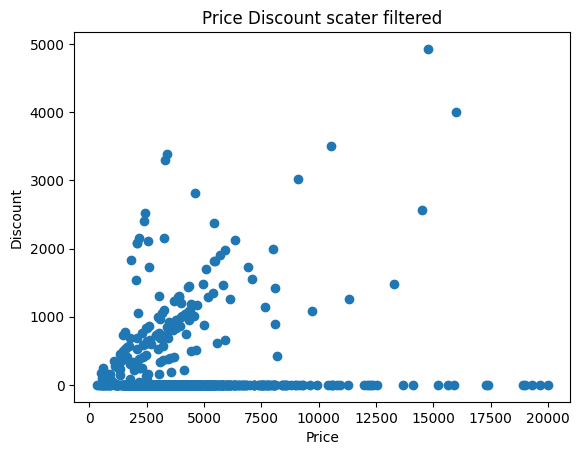

In [75]:
df = df[(df.Price < 20000) & (df.Discount < 5000)]
plt.scatter(df.Price, df.Discount)

plt.title('Price Discount scater filtered')
plt.xlabel('Price')
plt.ylabel('Discount')

plt.savefig('images/normal/Price Discount scater filtered.png', bbox_inches='tight')
plt.savefig('images/transparent/Breakfast Cancelation filtered.png', bbox_inches='tight', transparent=True)

plt.show()

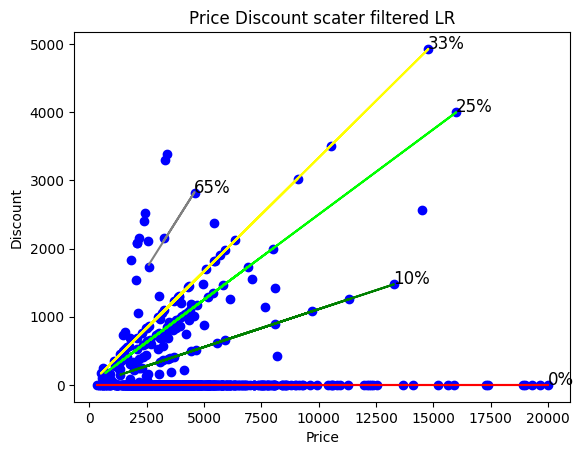

In [16]:
from sklearn.linear_model import LinearRegression


# Filter the data where discount is 0
df0 = df[df.Discount == 0]
x0 = df0.Price.values.reshape(-1, 1)
y0 = df0.Discount.values.reshape(-1, 1)
reg0 = LinearRegression().fit(x0, y0)
y_pred0 = reg0.predict(x0)

# Filter the data where discount is 10
df10 = df[(df.Discount != 0) & (abs(df.Discount / df.Price) > 0.08) & (abs(df.Discount / df.Price) < 0.12)]
x10 = df10.Price.values.reshape(-1, 1)
y10 = df10.Discount.values.reshape(-1, 1)
reg10 = LinearRegression().fit(x10, y10)
y_pred10 = reg10.predict(x10)

# Filter the data where discount is 25
df25 = df[(df.Discount != 0) & (abs(df.Discount / df.Price) > 0.24) & (abs(df.Discount / df.Price) < 0.26)]
x25 = df25.Price.values.reshape(-1, 1)
y25 = df25.Discount.values.reshape(-1, 1)
reg25 = LinearRegression().fit(x25, y25)
y_pred25 = reg25.predict(x25)

# Filter the data where discount is 33
df33 = df[(df.Discount != 0) & (abs(df.Discount / df.Price) > 0.32) & (abs(df.Discount / df.Price) < 0.34)]
x33 = df33.Price.values.reshape(-1, 1)
y33 = df33.Discount.values.reshape(-1, 1)
reg33 = LinearRegression().fit(x33, y33)
y_pred33 = reg33.predict(x33)

# Filter the data where discount is 65
df65 = df[(df.Discount != 0) & (abs(df.Discount / df.Price) > 0.6) & (abs(df.Discount / df.Price) < 0.7)]
x65 = df65.Price.values.reshape(-1, 1)
y65 = df65.Discount.values.reshape(-1, 1)
reg65 = LinearRegression().fit(x65, y65)
y_pred65 = reg65.predict(x65)

# Plot the scatter plot
plt.scatter(df.Price, df.Discount, color='blue')

# Plot the regression line
plt.plot(x0, y_pred0, color='red')
plt.plot(x10, y_pred10, color='green')
plt.plot(x25, y_pred25, color='lime')
plt.plot(x33, y_pred33, color='yellow')
plt.plot(x65, y_pred65, color='grey')

plt.text(x0.max()-20, y0.max()+1, '0%', fontsize=12)
plt.text(x10.max()-20, y10.max()+1, '10%', fontsize=12)
plt.text(x25.max()-20, y25.max()+1, '25%', fontsize=12)
plt.text(x33.max()-20, y33.max()+1, '33%', fontsize=12)
plt.text(x65.max()-20, y65.max()+1, '65%', fontsize=12)

# Add labels to the axes
plt.title('Price Discount scater filtered LR')
plt.xlabel('Price')
plt.ylabel('Discount')

plt.savefig('images/normal/Price Discount scater filtered LR.png', bbox_inches='tight')
plt.savefig('images/transparent/Breakfast Cancelation filtered LR.png', bbox_inches='tight', transparent=True)

# Show the plot
plt.show()